# Qdrant + Reranker를 활용한 고급 RAG 시스템 구축

#### 1. 라이브러리 설치


In [ ]:
# %pip install langchain langchain-community langchain-openai langchain-ollama langchain-qdrant 

#### 2. 라이브러리 임포트

In [5]:
from dotenv import load_dotenv
load_dotenv()

from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough


print("✅ 라이브러리 임포트 완료!")

✅ 라이브러리 임포트 완료!


#### 3. LLM 모델 설정

In [6]:
from langchain_ollama import ChatOllama
from langchain_openai import ChatOpenAI

# ChatGPT 초기화
llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)

# Ollama LLM 초기화
gemma = ChatOllama(model="gemma3:4b", temperature=0)

# 테스트
for chunk in gemma.stream("안녕하세요! 간단히 인사해주세요."):
    print(chunk.content, end="", flush=True)

안녕하세요! 😊 좋은 하루 보내세요!



#### 4. 폴더 내 특정 PDF 파일 로드하기

In [7]:
import os
from typing import List, Dict
from langchain.schema import Document
from langchain_community.document_loaders import PyPDFLoader
# PDF 문서 로딩
data_folder = "./data"


def load_specific_pdf_documents(data_folder: str) -> List[Document]:
    """
    data 폴더 내의 특정 PDF 파일들을 로딩합니다.
    """
    documents = []
    
    # 로딩할 특정 PDF 파일명들
    target_files = [
        "국가별 공공부문 AI 도입 및 활용 전략.pdf",
        "모빌리티_오픈소스_활성화_방안.pdf", 
        "피지컬_AI_현황과_시사점.pdf",
        "AI_인재_양성_정책_현황.pdf"
    ]
    
    # 각 파일을 찾아서 로딩
    for filename in target_files:
        pdf_path = os.path.join(data_folder, filename)
        
        if os.path.exists(pdf_path):
            print(f"📄 로딩 중: {filename}")
            loader = PyPDFLoader(pdf_path)
            file_documents = loader.load()
            documents.extend(file_documents)
        else:
            print(f"⚠️ 파일을 찾을 수 없습니다: {filename}")
    
    print(f"✅ 총 {len(documents)}개의 문서 페이지가 로딩되었습니다.")
    return documents

# PDF 문서 로딩 실행
documents = load_specific_pdf_documents(data_folder)

📄 로딩 중: 국가별 공공부문 AI 도입 및 활용 전략.pdf
📄 로딩 중: 모빌리티_오픈소스_활성화_방안.pdf
📄 로딩 중: 피지컬_AI_현황과_시사점.pdf
📄 로딩 중: AI_인재_양성_정책_현황.pdf
✅ 총 336개의 문서 페이지가 로딩되었습니다.


In [10]:
print(documents[0].metadata)

{'producer': 'Adobe PDF Library 17.0', 'creator': 'Adobe InDesign 19.5 (Macintosh)', 'creationdate': '2024-11-29T11:10:01+09:00', 'moddate': '2024-11-29T11:10:16+09:00', 'trapped': '/False', 'source': './data\\국가별 공공부문 AI 도입 및 활용 전략.pdf', 'total_pages': 48, 'page': 0, 'page_label': '1'}


#### 5. PDF 파일 청킹하기

In [11]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# 문서 청킹 (Chunk 분할)
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200,
    length_function=len,
    separators=["\n\n", "\n"]
)

# 문서 분할 실행
chunks = text_splitter.split_documents(documents)

print(f"✅ 총 {len(chunks)}개의 청크로 분할되었습니다.")
print(f"첫 번째 청크 미리보기: {chunks[0].page_content[:200]}...")

✅ 총 550개의 청크로 분할되었습니다.
첫 번째 청크 미리보기: I 행정혁신연구실
우하린 부연구위원(행정혁신연구실)
송방현 연구보조원(행정혁신연구실)
국가별 공공부문 AI 
도입 및 활용 전략
KIPA 
KOREA INSTITUTE OF 
PUBLIC ADMINISTRATION정부혁신
2024년
VOL.4
 영국,  호주,  미국 사례를 
중심으로...


청크 사이즈 통계:
- 총 청크 수: 550
- 평균 사이즈: 724.9
- 최소 사이즈: 5
- 최대 사이즈: 6529
- 중간값: 732.0


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30660\2961950553.py:33: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30660\2961950553.py:33: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30660\2961950553.py:33: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30660\2961950553.py:33: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30660\2961950553.py:33: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30660\296195055

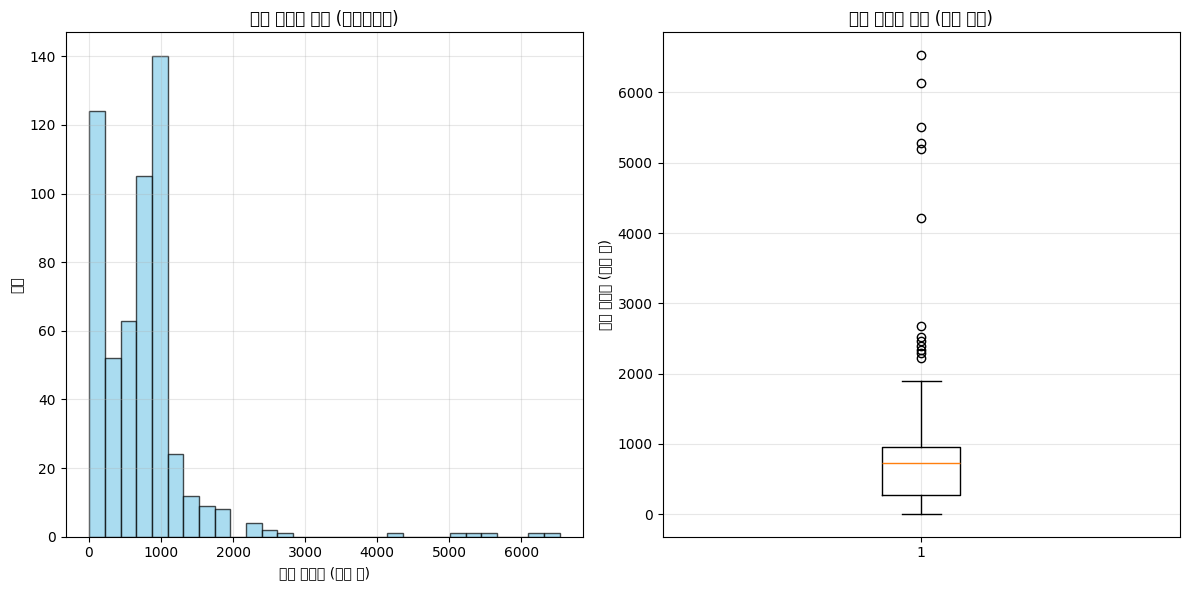

[159,
 75,
 60,
 976,
 378,
 81,
 975,
 671,
 982,
 343,
 795,
 974,
 315,
 759,
 57,
 924,
 326,
 986,
 256,
 713,
 983,
 564,
 980,
 946,
 976,
 525,
 963,
 670,
 947,
 393,
 994,
 591,
 931,
 736,
 950,
 456,
 66,
 936,
 578,
 969,
 732,
 995,
 929,
 960,
 503,
 995,
 760,
 778,
 995,
 334,
 57,
 461,
 812,
 925,
 667,
 970,
 819,
 996,
 737,
 967,
 909,
 974,
 614,
 975,
 322,
 97,
 982,
 979,
 451,
 957,
 791,
 973,
 734,
 938,
 968,
 690,
 934,
 977,
 47,
 272,
 116,
 95,
 2523,
 6,
 6529,
 5,
 6135,
 6,
 5285,
 7,
 5509,
 8,
 5195,
 6,
 4207,
 985,
 943,
 959,
 517,
 994,
 577,
 630,
 6,
 1020,
 272,
 8,
 2221,
 9,
 1894,
 58,
 7,
 2389,
 409,
 6,
 1225,
 719,
 7,
 1225,
 599,
 938,
 1073,
 9,
 2671,
 919,
 5,
 1106,
 243,
 769,
 642,
 5,
 996,
 613,
 995,
 119,
 987,
 209,
 460,
 719,
 570,
 516,
 631,
 765,
 849,
 439,
 990,
 394,
 679,
 901,
 162,
 752,
 661,
 718,
 870,
 767,
 832,
 660,
 835,
 543,
 614,
 804,
 644,
 676,
 602,
 849,
 587,
 838,
 997,
 132,
 630,
 262,
 866

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 청크 사이즈 계산
chunk_sizes = [len(chunk.page_content) for chunk in chunks]

# 통계 정보 출력
print(f"청크 사이즈 통계:")
print(f"- 총 청크 수: {len(chunk_sizes)}")
print(f"- 평균 사이즈: {np.mean(chunk_sizes):.1f}")
print(f"- 최소 사이즈: {min(chunk_sizes)}")
print(f"- 최대 사이즈: {max(chunk_sizes)}")
print(f"- 중간값: {np.median(chunk_sizes):.1f}")

# 히스토그램으로 사이즈 분포 시각화
plt.figure(figsize=(12, 6))

# 히스토그램
plt.subplot(1, 2, 1)
plt.hist(chunk_sizes, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('청크 사이즈 분포 (히스토그램)')
plt.xlabel('청크 사이즈 (문자 수)')
plt.ylabel('빈도')
plt.grid(True, alpha=0.3)

# 박스 플롯
plt.subplot(1, 2, 2)
plt.boxplot(chunk_sizes)
plt.title('청크 사이즈 분포 (박스 플롯)')
plt.ylabel('청크 사이즈 (문자 수)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 청크 사이즈 리스트도 출력
chunk_sizes

#### 6. Qdrant 벡터DB 클라이언트 초기화 및 임베딩 모델 설정

In [14]:
from langchain_community.embeddings import OllamaEmbeddings
from qdrant_client import QdrantClient
from qdrant_client.models import Distance, VectorParams, PointStruct
from langchain_qdrant import QdrantVectorStore

# Qdrant 클라이언트 초기화 (로컬 Docker 연결)
qdrant_client = QdrantClient(
    host="localhost",
    port=6333
)

# Ollama 임베딩 모델 설정 (bge-m3)
embedding_model = OllamaEmbeddings(
    model="bge-m3"
)

print("✅ Qdrant 클라이언트 및 Ollama 임베딩 모델 초기화 완료")

✅ Qdrant 클라이언트 및 Ollama 임베딩 모델 초기화 완료


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_30660\2119353095.py:13: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embedding_model = OllamaEmbeddings(


#### 7. Qdrant 벡터DB 컬렉션 생성 및 로드

In [16]:
# Qdrant Vector Store 생성 및 문서 추가
collection_name = "pdf_rerank"

# qdrant_client.create_collection(
#     collection_name=collection_name,
#     vectors_config=VectorParams(size=1024, distance=Distance.COSINE),
# )

vector_store = QdrantVectorStore(
    client=qdrant_client,
    collection_name=collection_name,
    embedding=embedding_model,
)

# 문서를 벡터 스토어에 추가
print("문서를 벡터 스토어에 추가 중...")
vector_store.add_documents(chunks)
print(f"✅ {len(chunks)}개의 문서가 Qdrant에 저장되었습니다.")

문서를 벡터 스토어에 추가 중...


KeyboardInterrupt: 

In [17]:
retriever = vector_store.as_retriever(
    search_kwargs={"k": 10}
)

#### 8. Huggingface에서 Reranker 모델 가져오기

In [18]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import CrossEncoderReranker
from langchain_community.cross_encoders import HuggingFaceCrossEncoder

# 모델 초기화
model = HuggingFaceCrossEncoder(model_name="BAAI/bge-reranker-v2-m3")

# 상위 3개의 문서 선택
compressor = CrossEncoderReranker(model=model, top_n=5)

# 문서 압축 검색기 초기화
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=retriever
)

In [19]:
def print_search_results(docs, title):
    """검색 결과를 이쁘게 출력하는 함수"""
    print(f"{title}")
    print("=" * 80)
    print(f"검색된 문서 수: {len(docs)}개\n")
    
    for i, doc in enumerate(docs, 1):
        print(f"📄 문서 {i}")
        print(f"📂 출처: {doc.metadata.get('source', 'N/A')}")
        print(f"📃 페이지: {doc.metadata.get(' page', 'N/A')}")
        print(f"📝 내용 미리보기:")
        print(doc.page_content)
        print("-" * 40)

#### 9. Reranking 결과 확인해보기

In [20]:
# 검색 쿼리
query = "우리나라 피지컬 AI 인재 수급에 관한 정보를 알려주세요"

# 기본 retriever 검색
basic_docs = retriever.invoke(query)
print_search_results(basic_docs, "🔍 기본 Retriever 검색 결과:")

print("\n" + "=" * 80)

# Reranker 적용된 검색
compressed_docs = compression_retriever.invoke(query)
print_search_results(compressed_docs, "🎯 Reranker 적용된 검색 결과:")

print("\n📊 비교 결과:")
print(f"기본 검색: {len(basic_docs)}개 → Reranker 적용: {len(compressed_docs)}개")

🔍 기본 Retriever 검색 결과:
검색된 문서 수: 10개

📄 문서 1
📂 출처: ./data\피지컬_AI_현황과_시사점.pdf
📃 페이지: N/A
📝 내용 미리보기:
SPRi 이슈리포트 IS-202 피지컬 AI의 현황과 시사점
----------------------------------------
📄 문서 2
📂 출처: ./data\피지컬_AI_현황과_시사점.pdf
📃 페이지: N/A
📝 내용 미리보기:
SPRi 이슈리포트 IS-202 피지컬 AI의 현황과 시사점
1
----------------------------------------
📄 문서 3
📂 출처: ./data\피지컬_AI_현황과_시사점.pdf
📃 페이지: N/A
📝 내용 미리보기:
피지컬 AI의 현황과 시사점Current Status and Implications of Physical AI경기도 성남시 분당구 대왕판교로 712번길 22 글로벌 R&D 연구동(B) 4층Global R&D Center 4F 22 Daewangpangyo-ro 712beon-gil, Bundang-gu, Seongnam-si, Gyeonggi-do www.spri.kr 
----------------------------------------
📄 문서 4
📂 출처: ./data\피지컬_AI_현황과_시사점.pdf
📃 페이지: N/A
📝 내용 미리보기:
SPRi 이슈리포트 IS-202 피지컬 AI의 현황과 시사점
30
----------------------------------------
📄 문서 5
📂 출처: ./data\피지컬_AI_현황과_시사점.pdf
📃 페이지: N/A
📝 내용 미리보기:
SPRi 이슈리포트 IS-202 피지컬 AI의 현황과 시사점
2
----------------------------------------
📄 문서 6
📂 출처: ./data\AI_인재_양성_정책_현황.pdf
📃 페이지: N/A
📝 내용 미리보기:
Ÿ해외 인재가 직접 한국을 체험하고, 창업·취업·협력아이디어 구상Ÿ국내 

In [24]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough


# RAG용 프롬프트 템플릿 정의
rag_prompt = ChatPromptTemplate.from_template("""
다음 문서들을 참고하여 질문에 답변해주세요. 
답변은 한국어로 작성하고, 제공된 문서의 내용을 바탕으로 정확하고 상세하게 설명해주세요.

참고 문서:
{context}

질문: {question}

답변:
""")

# 문서를 문자열로 변환하는 함수
def format_docs(docs):
    formatted_docs = []
    for i, doc in enumerate(docs, 1):
        source = doc.metadata.get('source', 'Unknown')        
        formatted_docs.append(f"""
                              <문서 {i}>
                              문서 {i}: {source}
                              내용: {doc.page_content}
                              </문서 {i}>
                                """)
        print(formatted_docs)
    return "\n".join(formatted_docs)

# LCEL 체인 구성
rag_chain = (
    {
        "context": compression_retriever | format_docs,
        "question": RunnablePassthrough()
    }
    | rag_prompt
    | gemma
    | StrOutputParser()
)

print("✅ LCEL 기반 RAG 체인 구성 완료")

✅ LCEL 기반 RAG 체인 구성 완료


In [ ]:
# 기본 RAG 체인 테스트
question = "피지컬 AI 기술이 우리 사회에 미치는 영향은 무엇인가요?"

print(f"🤖 질문: {question}")
print("=" * 60)

# LCEL 체인 실행
print("📝 답변:")
for chunk in rag_chain.stream(question):
    print(chunk, end="", flush=True)
print()  # 줄바꿈 추가

🤖 질문: 피지컬 AI 기술이 우리 사회에 미치는 영향은 무엇인가요?
📝 답변:
['\n                              <문서 1>\n                              문서 1: ./data\\피지컬_AI_현황과_시사점.pdf\n                              내용: 변화, 책임 소재, 감정적 영향 등 복합적 사회 문제를 야기할 가능성 존재●동시에 미국, 중국, EU, 일본 등 주요국은 피지컬 AI를 국가 전략기술로 간주하고 다양한 정책을 선제적으로 마련해 경쟁력 확보에 나서고 있으며, 이는 피지컬 AI가 생성형 AI에 이어 미래 산업 패권뿐 아니라 안보·외교·표준 경쟁의 핵심 전장이 될 수 있음을 시사5.2\x00정책\x00시사점■(국가전략) AI·로봇 융합 시대에 대응한 국가 차원의 피지컬 AI 전략 수립 필요 ●피지컬 AI는 아직 상업적 확산 초기 단계이나, 기술 발전 및 점진적인 생산 단가 하락에 따라 제조, 물류, 교통, 국방 등 다양한 산업 분야로의 빠른 확산이 예상●한국은 ICT 강점과 제조업 기반 등 산업적 특성을 반영한 국가적 차원의 피지컬 AI 전략을 수립하고, 산업 및 공공부문의 실증과 상용화를 적극 추진 필요●AI 및 로봇 정책을 통합적으로 조율할 수 있는 ‘피지컬 AI 전략위원회’ 등을 신설해, R&D 투자, 규제 개선, 국제 협력 등을 총괄하는 거버넌스 체계 마련이 필요∙ 구체적으로 기획·예산 편성·사업 수행이 가능한 협력과제 체계를 마 련 하 고, 산업 현장 중심의 실증 연계형 과제(e.g\n                              </문서 1>\n                                ']
['\n                              <문서 1>\n                              문서 1: ./data\\피지컬_AI_현황과_시사점.pdf\n                              내용: 변화